In [1]:
import os
import glob
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sys.path.append('/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/statistics_collection')

import StatsAnalytics as sa
import StatsPlots as sp

In [2]:
# os.chdir('../../')
os.getcwd()

'/Users/maoxiali/Library/CloudStorage/OneDrive-ETHZurich/太神奇了/iber_lab/embryo_compaction/EpiStats/src/tutorials'

## 1. Load the tissue dataframes

In [3]:
# Load dataframes
out_root_path = '../../../cell_stats/movie_4/'
# df_files = [
#     'before_compaction.csv',
#     'after_compaction.csv',
# ]
df_files = [os.path.basename(file) for file in glob.glob(os.path.join(out_root_path, '*.csv'))]

df_paths = [os.path.join(out_root_path, df_file) for df_file in df_files]

cell_stats_df = sa.prepare_df(paths_to_dfs=df_paths)

# for csv files not generated by the integrated code
cell_stats_df = []
for file in df_paths:
    df = pd.read_csv(file)
    df['file_name'] = file  # Adding the "file_name" column
    cell_stats_df.append(df)
cell_stats_df = pd.concat(cell_stats_df, ignore_index=True)

cell_stats_df

,cell_id,cell_area,cell_volume,cell_isoperimetric_ratio,cell_neighbors,cell_nb_of_neighbors,cell_principal_axis,cell_elongation,cell_contact_area_fraction,cell_contact_area_distribution,cell_mean_contact_area,file_name
0,1,3318.393182,11622.438779,270.513531,2 3 4 5 6 8,6,-6.78e-01 -7.34e-01 3.74e-02,1.278567,0.658862,"[433.6938026101668, 323.46646064294316, 507.13...",364.393732,../../../cell_stats/movie_4/time_11.csv
1,2,4152.654128,19992.841915,179.154705,1 3 5 7 8,5,5.37e-02 -4.09e-01 9.11e-01,1.175320,0.530898,"[433.84357124925384, 457.1091359929912, 502.05...",440.926835,../../../cell_stats/movie_4/time_11.csv
2,3,3819.870911,18517.706176,162.544277,1 2 4 5 6 7 8,7,-3.14e-01 4.97e-01 -8.09e-01,1.088604,0.723359,"[321.25737046307063, 458.25521284735805, 356.7...",394.733756,../../../cell_stats/movie_4/time_11.csv
3,4,4182.662712,20968.135100,166.432801,1 3 6 8,4,3.42e-01 9.38e-01 6.32e-02,1.141931,0.344039,"[509.03968649356847, 352.4002150386974, 519.76...",359.750104,../../../cell_stats/movie_4/time_11.csv
4,5,3257.967312,11533.121269,259.983898,1 2 3 6 7,5,2.93e-01 9.50e-01 1.05e-01,1.266180,0.614413,"[241.78130640629053, 499.07303574101775, 193.7...",400.347488,../../../cell_stats/movie_4/time_11.csv
5,6,4103.691274,20407.492158,165.937585,1 3 4 5 7,5,1.45e-02 -3.69e-01 9.29e-01,1.105140,0.505108,"[149.46472586774485, 543.2134539599294, 519.44...",414.561863,../../../cell_stats/movie_4/time_11.csv
6,7,3790.761639,17820.725367,171.525493,2 3 5 6,4,-8.07e-01 -5.81e-01 -1.08e-01,1.147880,0.465761,"[353.6852319383778, 401.52830492088424, 607.05...",441.397211,../../../cell_stats/movie_4/time_11.csv
7,8,4499.051341,23340.984441,167.156977,1 2 3 4,4,-5.03e-01 3.71e-01 -7.81e-01,1.166487,0.340604,"[527.2703794795486, 457.6010169514483, 488.990...",383.098283,../../../cell_stats/movie_4/time_11.csv
8,1,4542.635603,23491.178847,169.868980,2 3 4 5,4,8.20e-01 -2.67e-01 5.07e-01,1.150165,0.389575,"[591.7796608907263, 260.82192885844563, 476.41...",442.424530,../../../cell_stats/movie_4/time_16.csv
9,2,3420.783935,12765.216641,245.652140,1 3 4 5 6 7,6,6.66e-01 7.45e-01 -4.22e-02,1.272323,0.669160,"[591.9933773633395, 484.15243266703874, 293.31...",381.508672,../../../cell_stats/movie_4/time_16.csv


In [4]:
# Rename the columns
cell_stats_df['tissue'] = 'Time from beginning (hours)'
for i in range(len(cell_stats_df)):
    if cell_stats_df.loc[i, 'file_name'].find('time_1') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '0.0'
    if cell_stats_df.loc[i, 'file_name'].find('time_6') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '1.3'
    if cell_stats_df.loc[i, 'file_name'].find('time_11') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '2.6'
    if cell_stats_df.loc[i, 'file_name'].find('time_16') != -1:
        cell_stats_df.loc[i, 'tissue_type'] = '3.9'
    # if cell_stats_df.loc[i, 'file_name'].find('time_25') != -1:
    #     cell_stats_df.loc[i, 'tissue_type'] = '5.2'
    # if cell_stats_df.loc[i, 'file_name'].find('time_30') != -1:
    #     cell_stats_df.loc[i, 'tissue_type'] = '6.5'
    # if cell_stats_df.loc[i, 'file_name'].find('time_35') != -1:
    #     cell_stats_df.loc[i, 'tissue_type'] = '7.8'
    # if cell_stats_df.loc[i, 'file_name'].find('time_40') != -1:
    #     cell_stats_df.loc[i, 'tissue_type'] = '9.1'

# Sort the DataFrame by 'tissue_type'
cell_stats_df['tissue_type'] = pd.to_numeric(cell_stats_df['tissue_type'], errors='coerce')
cell_stats_df = cell_stats_df.sort_values(by='tissue_type')
cell_stats_df['tissue_type'] = cell_stats_df['tissue_type'].astype(str)

# Reset the index to maintain a sequential order
cell_stats_df = cell_stats_df.reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
# cell_stats_df.to_csv(os.path.join(out_root_path, 'cell_stats_df.csv'), index=False)
cell_stats_df

,cell_id,cell_area,cell_volume,cell_isoperimetric_ratio,cell_neighbors,cell_nb_of_neighbors,cell_principal_axis,cell_elongation,cell_contact_area_fraction,cell_contact_area_distribution,cell_mean_contact_area,file_name,tissue,tissue_type
0,7,3820.193637,17667.540389,178.609249,1 4 5 6,4,-1.52e-01 2.55e-01 9.55e-01,1.178586,0.435552,"[239.72579387159277, 685.2251548152611, 350.38987828108577, 388.5533532319557]",415.973545,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
1,5,3764.327023,17814.584809,168.077905,1 2 3 4 6 7,6,2.74e-01 -7.10e-01 6.49e-01,1.138708,0.625716,"[444.0196863001174, 264.36668874430757, 317.56811123281767, 229.33139279686154, 747.9250736874548, 352.1884453837065]",392.566566,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
2,4,2958.230124,9237.083816,303.407350,1 3 5 6 7,5,2.67e-01 9.63e-01 4.48e-02,1.221536,0.653109,"[442.1522935268687, 278.0429672575681, 229.90758182249505, 296.4025601975379, 685.540908508511]",386.409262,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
3,3,3593.604078,13393.540270,258.702072,1 2 4 5 6,5,-3.68e-02 -9.92e-01 1.22e-01,1.281518,0.511601,"[663.6545863145489, 465.53460264224464, 278.0440729181772, 316.35793538974775, 114.90129017253551]",367.698497,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
4,2,3744.145932,17108.890333,179.314173,3 5 6,3,8.33e-02 -9.96e-01 -4.03e-02,1.257909,0.305083,"[465.5125275667425, 265.01055579708037, 411.7506796833597]",380.757921,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
5,1,6695.232814,46334.254854,139.795337,3 4 5 7,4,7.40e-01 -6.60e-01 -1.32e-01,1.078033,0.270222,"[670.4898762514711, 449.27088443830655, 445.389754578627, 244.04545861029663]",452.298993,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
6,6,3804.117015,16669.602337,198.112155,2 3 4 5 7,5,4.63e-01 -8.37e-01 2.93e-01,1.153733,0.515083,"[412.2379264684253, 113.72793446182578, 297.83543228742894, 744.5123208420775, 391.1206048039684]",391.886844,../../../cell_stats/movie_4/time_1.csv,Time from beginning (hours),0.0
7,8,3959.019233,19045.390260,171.073634,2 3 5 6 7,5,3.07e-01 -8.82e-01 3.58e-01,1.092065,0.504940,"[133.95810003074297, 479.417342316341, 408.93441488462804, 611.6866547535783, 365.0713691105383]",399.813576,../../../cell_stats/movie_4/time_6.csv,Time from beginning (hours),1.3
8,7,3732.574483,17485.022154,170.095598,4 5 6 8,4,-6.18e-01 -6.57e-01 -4.31e-01,1.165610,0.457033,"[305.8000447708181, 669.5697642746652, 364.3327712814429, 366.206099547107]",426.477170,../../../cell_stats/movie_4/time_6.csv,Time from beginning (hours),1.3
9,6,3718.681022,17830.573925,161.746964,1 2 3 4 5 7 8,7,-1.44e-01 6.57e-01 -7.40e-01,1.094696,0.709218,"[323.65005870526727, 390.8510487239957, 271.17250734394855, 426.74812510296954, 243.62824891451893, 365.1687877753248, 616.137982975303]",376.765251,../../../cell_stats/movie_4/time_6.csv,Time from beginning (hours),1.3


In [7]:
# # rename the columns
# for i in range(len(cell_stats_df)):
#     if cell_stats_df.loc[i, 'file_name'].find('part_1') != -1:
#         cell_stats_df.loc[i, 'tissue_type'] = '4-cell stage'
#         cell_stats_df.loc[i, 'tissue'] = 'Before compaction'
#     else:
#         cell_stats_df.loc[i, 'tissue_type'] = '8-cell stage'
#         cell_stats_df.loc[i, 'tissue'] = 'After compaction'
# pd.set_option('display.max_colwidth', None)
# cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area
0,1,Before compaction,4-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/cell_meshes/cell_1.stl,False,6903.123035,42049.415506,"[2, 3, 4]",186.044534,3,1.121104,[ 0.05873295 -0.24228107 -0.96842673],0.353921,"[772.24403579, 1036.77068395, 830.09959254]",879.704771,2639.114312
1,2,Before compaction,4-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/cell_meshes/cell_2.stl,False,7433.961196,48967.543306,"[1, 4]",171.334270,2,1.108344,[-0.1894087 -0.08634558 0.97809447],0.241502,"[772.1828536, 1115.931854]",944.057354,1888.114708
2,3,Before compaction,4-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/cell_meshes/cell_3.stl,False,7707.333973,52895.169419,"[1, 4]",163.636623,2,1.125810,[-0.01724793 0.16970527 0.98534391],0.230867,"[1022.08880014, 856.20407304]",939.146437,1878.292873
3,4,Before compaction,4-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_1_cell_boundary_time_1_s_4_e_2_d_3/cell_meshes/cell_4.stl,False,6493.453176,39740.218215,"[1, 2, 3]",173.367084,3,1.045642,[ 0.01825292 -0.9393181 0.34256144],0.400380,"[827.36117403, 1112.15334075, 859.47755491]",932.997357,2798.992070
4,1,After compaction,8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/cell_meshes/cell_1.stl,False,5096.124681,25159.818232,"[2, 3, 4, 5, 6]",209.076459,5,1.135104,[-0.44440811 0.57753995 0.68479854],0.524449,"[666.76542067, 823.48677672, 759.07028653, 628.34101198, 270.98262838]",629.729225,3148.646124
5,2,After compaction,8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/cell_meshes/cell_2.stl,False,4679.454523,22327.885075,"[1, 3, 6]",205.537238,3,1.215590,[0.19609207 0.41769051 0.88717672],0.452053,"[659.57560357, 974.00356527, 748.83930182]",794.139490,2382.418471
6,3,After compaction,8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/cell_meshes/cell_3.stl,False,4254.899341,19477.168818,"[1, 2, 4, 6]",203.056181,4,1.114240,[-0.40499204 0.4531777 -0.79411046],0.613112,"[818.13322958, 967.48821192, 622.77602166, 641.77519175]",762.543164,3050.172655
7,4,After compaction,8-cell stage,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/processed_labels.tif,/Volumes/iber/Projects/Early_Embryo/maoxia/movie_0608_2/stats_part_2_cell_boundary_time_10_s_4_e_2_d_3/cell_meshes/cell_4.stl,False,3919.135639,17539.318504,"[1, 3, 5, 6, 7, 8]",195.679556,6,1.205080,[ 0.36344477 -0.043002 0.93062276],0.682602,"[753.13994801, 627.0184059, 556.84736271, 264.88464979, 613.07541092, 407.68280902]",537.108098,3222.648586
8,5,After com

## 2. Process dataframe (outlier detection, numerical features extraction, standardization, ...)

In [5]:
# Rename columns


# # for csv files not generated by the integrated code
cell_stats_df = sa.rename_features(
    df=cell_stats_df,
    old_names=['cell_area', 'cell_volume', 'cell_isoperimetric_ratio', 'cell_neighbors', 'cell_nb_of_neighbors', 'cell_principal_axis', 'cell_elongation',
               'cell_contact_area_fraction', 'cell_contact_area_distribution', 'cell_mean_contact_area'],
    new_names=['surface_area', 'volume', 'isoperimetric_ratio', 'neighbors', 'num_neighbors', 'principal_axis', 'elongation',
               'contact_area_fraction', 'contact_area_distribution', 'mean_contact_area']
)
# cell_stats_df = sa.rename_features(
#     df=cell_stats_df,
#     old_names=['area'],
#     new_names=['surface_area']
# )

In [6]:
# Outlier detection
cell_stats_df = sa.detect_outliers(df=cell_stats_df, quantile_level=0.025)

Found a total of 2 volume outliers in Time from beginning (hours) sample,
of which:
    - Below lower bound: 1,
    - Above upper bound: 1. 
        


In [7]:
# Extract dataframe with only ids and numerical features to make it more handy for plotting
# The function also remove NA's
numeric_cell_stats_df = sa.extract_numerical(
    df=cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ],
    remove_na = True
)

Dropped 0 records containing NAs.


In [8]:
# Get standardized dataset (only numerical features)
std_cell_stats_df = sa.standardize(
    df=numeric_cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ]
)
std_cell_stats_df

,tissue,tissue_type,surface_area,volume,isoperimetric_ratio,num_neighbors,elongation,contact_area_fraction,mean_contact_area,is_outlier
0,Time from beginning (hours),0.0,-0.159900,-0.109740,-0.369557,-0.776206,0.060220,-0.572839,0.327332,False
1,Time from beginning (hours),0.0,-0.247270,-0.086785,-0.606865,1.074747,-0.559274,0.834293,-0.508474,False
2,Time from beginning (hours),0.0,-1.507933,-1.425797,2.442582,0.149270,0.727446,1.036990,-0.728337,True
3,Time from beginning (hours),0.0,-0.514266,-0.776943,1.435215,0.149270,1.659259,-0.010108,-1.396453,False
4,Time from beginning (hours),0.0,-0.278832,-0.196949,-0.353673,-1.701682,1.292492,-1.538262,-0.930132,False
5,Time from beginning (hours),0.0,4.336403,4.365348,-1.244171,-0.776206,-1.501863,-1.796219,1.624426,True
6,Time from beginning (hours),0.0,-0.185042,-0.265525,0.069912,0.149270,-0.325863,0.015652,-0.532746,False
7,Time from beginning (hours),1.3,0.057211,0.105353,-0.539361,0.149270,-1.283872,-0.059398,-0.249701,False
8,Time from beginning (hours),1.3,-0.296929,-0.138232,-0.561400,-0.776206,-0.141356,-0.413893,0.702391,False
9,Time from beginning (hours),1.3,-0.318657,-0.084289,-0.749524,2.000223,-1.242993,1.452177,-1.072701,False


## 3. Make plots

For all the plotting function we would need a list of the numerical features of the dataframe to plot. <br>
We also need specify a path to a directory in which to save all the plots.

In [9]:
numerical_features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'num_neighbors', 'elongation',
    'contact_area_fraction', 'mean_contact_area'
] # here you can also set the order of variables for the plots
save_plots_dir = '../../../cell_stats/movie_4/plots'

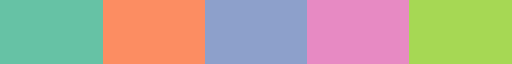

In [10]:
# Create a discrete colormap for plots (not used for correlation matrix)
# Note: in the plotting functions you can either choose a used defined cmap like this one,
# or a normal matplotlib colormap defined by a string (e.g., 'viridis')
colors = np.array([
    [102,194,165],
    [252,141,98],
    [141,160,203],
    [231,138,195],
    [166,216,84]
]) / 255
cell_cmap = sp.create_cmap(color_list = colors)
cell_cmap

### 3.1. Correlation Matrix

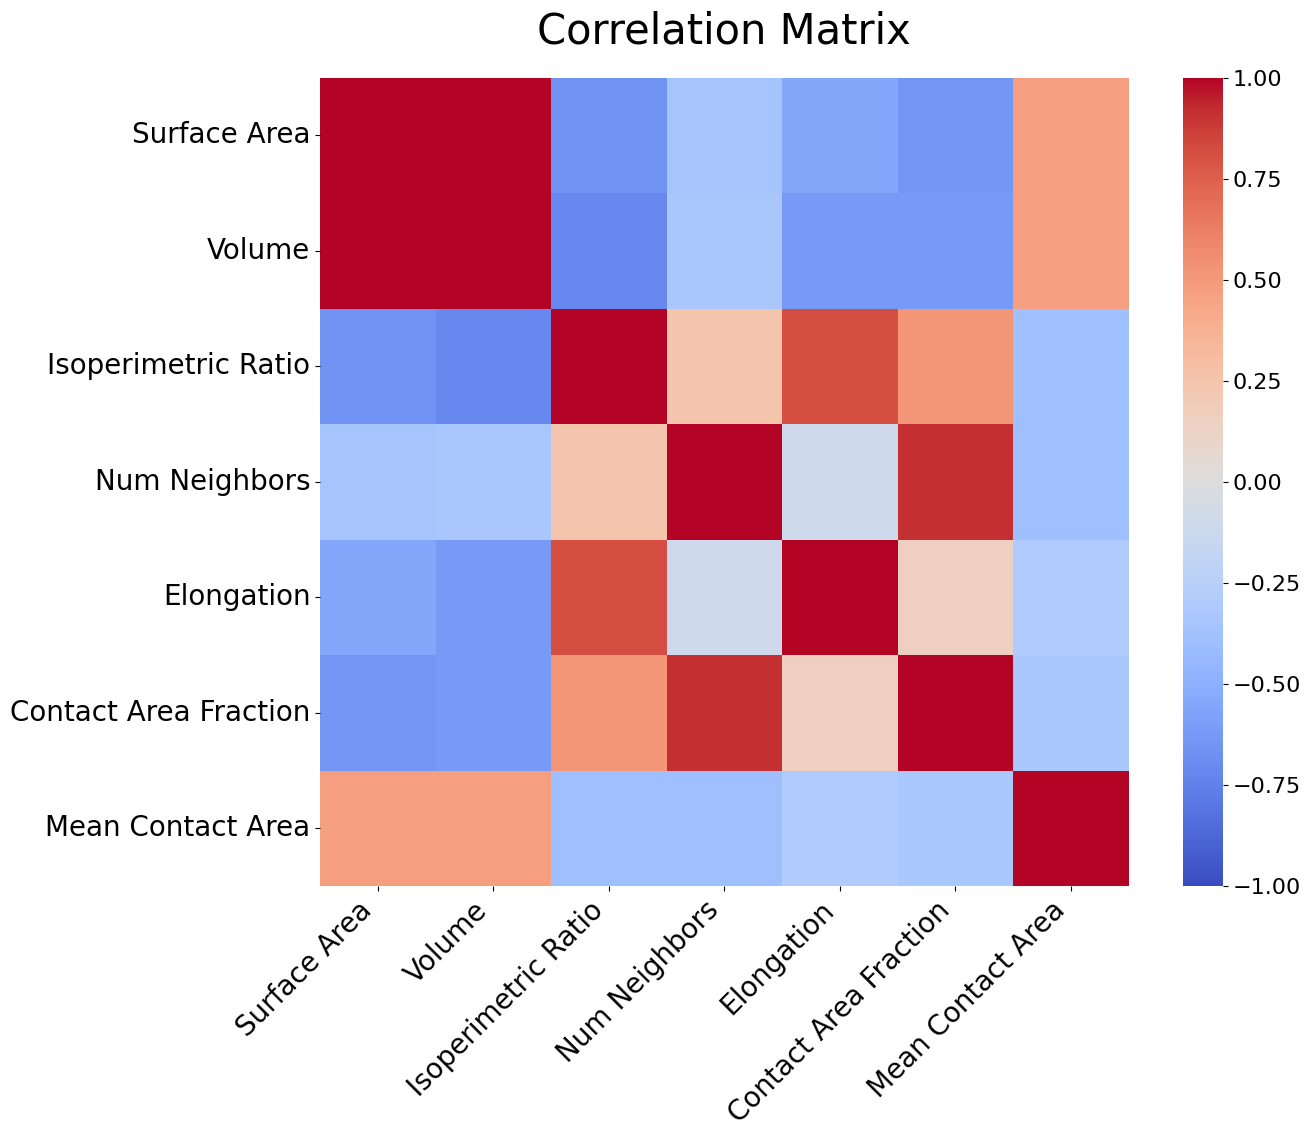

In [11]:
sp.corr_matrix_plot(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=False,
    color_map = 'coolwarm',
    save_dir=save_plots_dir,
    show=True
)

### 3.2. PCA plots

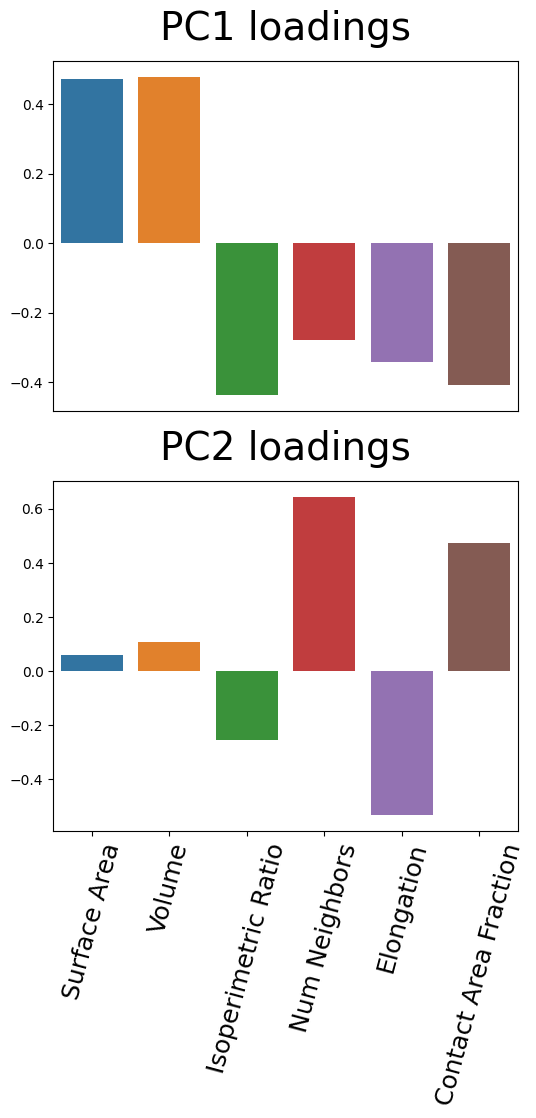

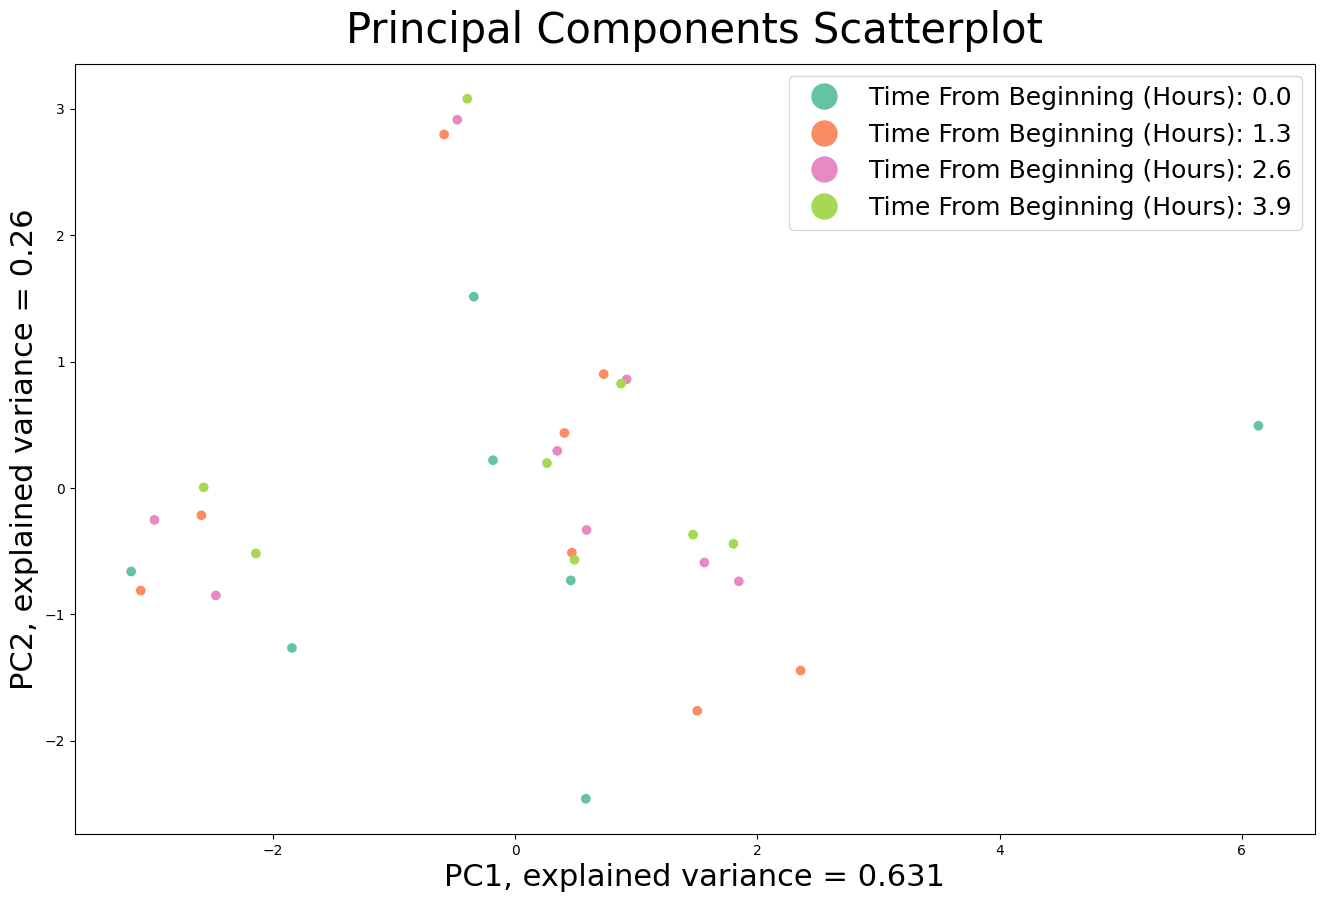

In [12]:
sp.pca_plots(
    df=std_cell_stats_df,
    numerical_features=numerical_features[:6],
    standardize_data=False,
    remove_outliers=False,
    color_map = cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.3. Grid of kdplots for different numerical features

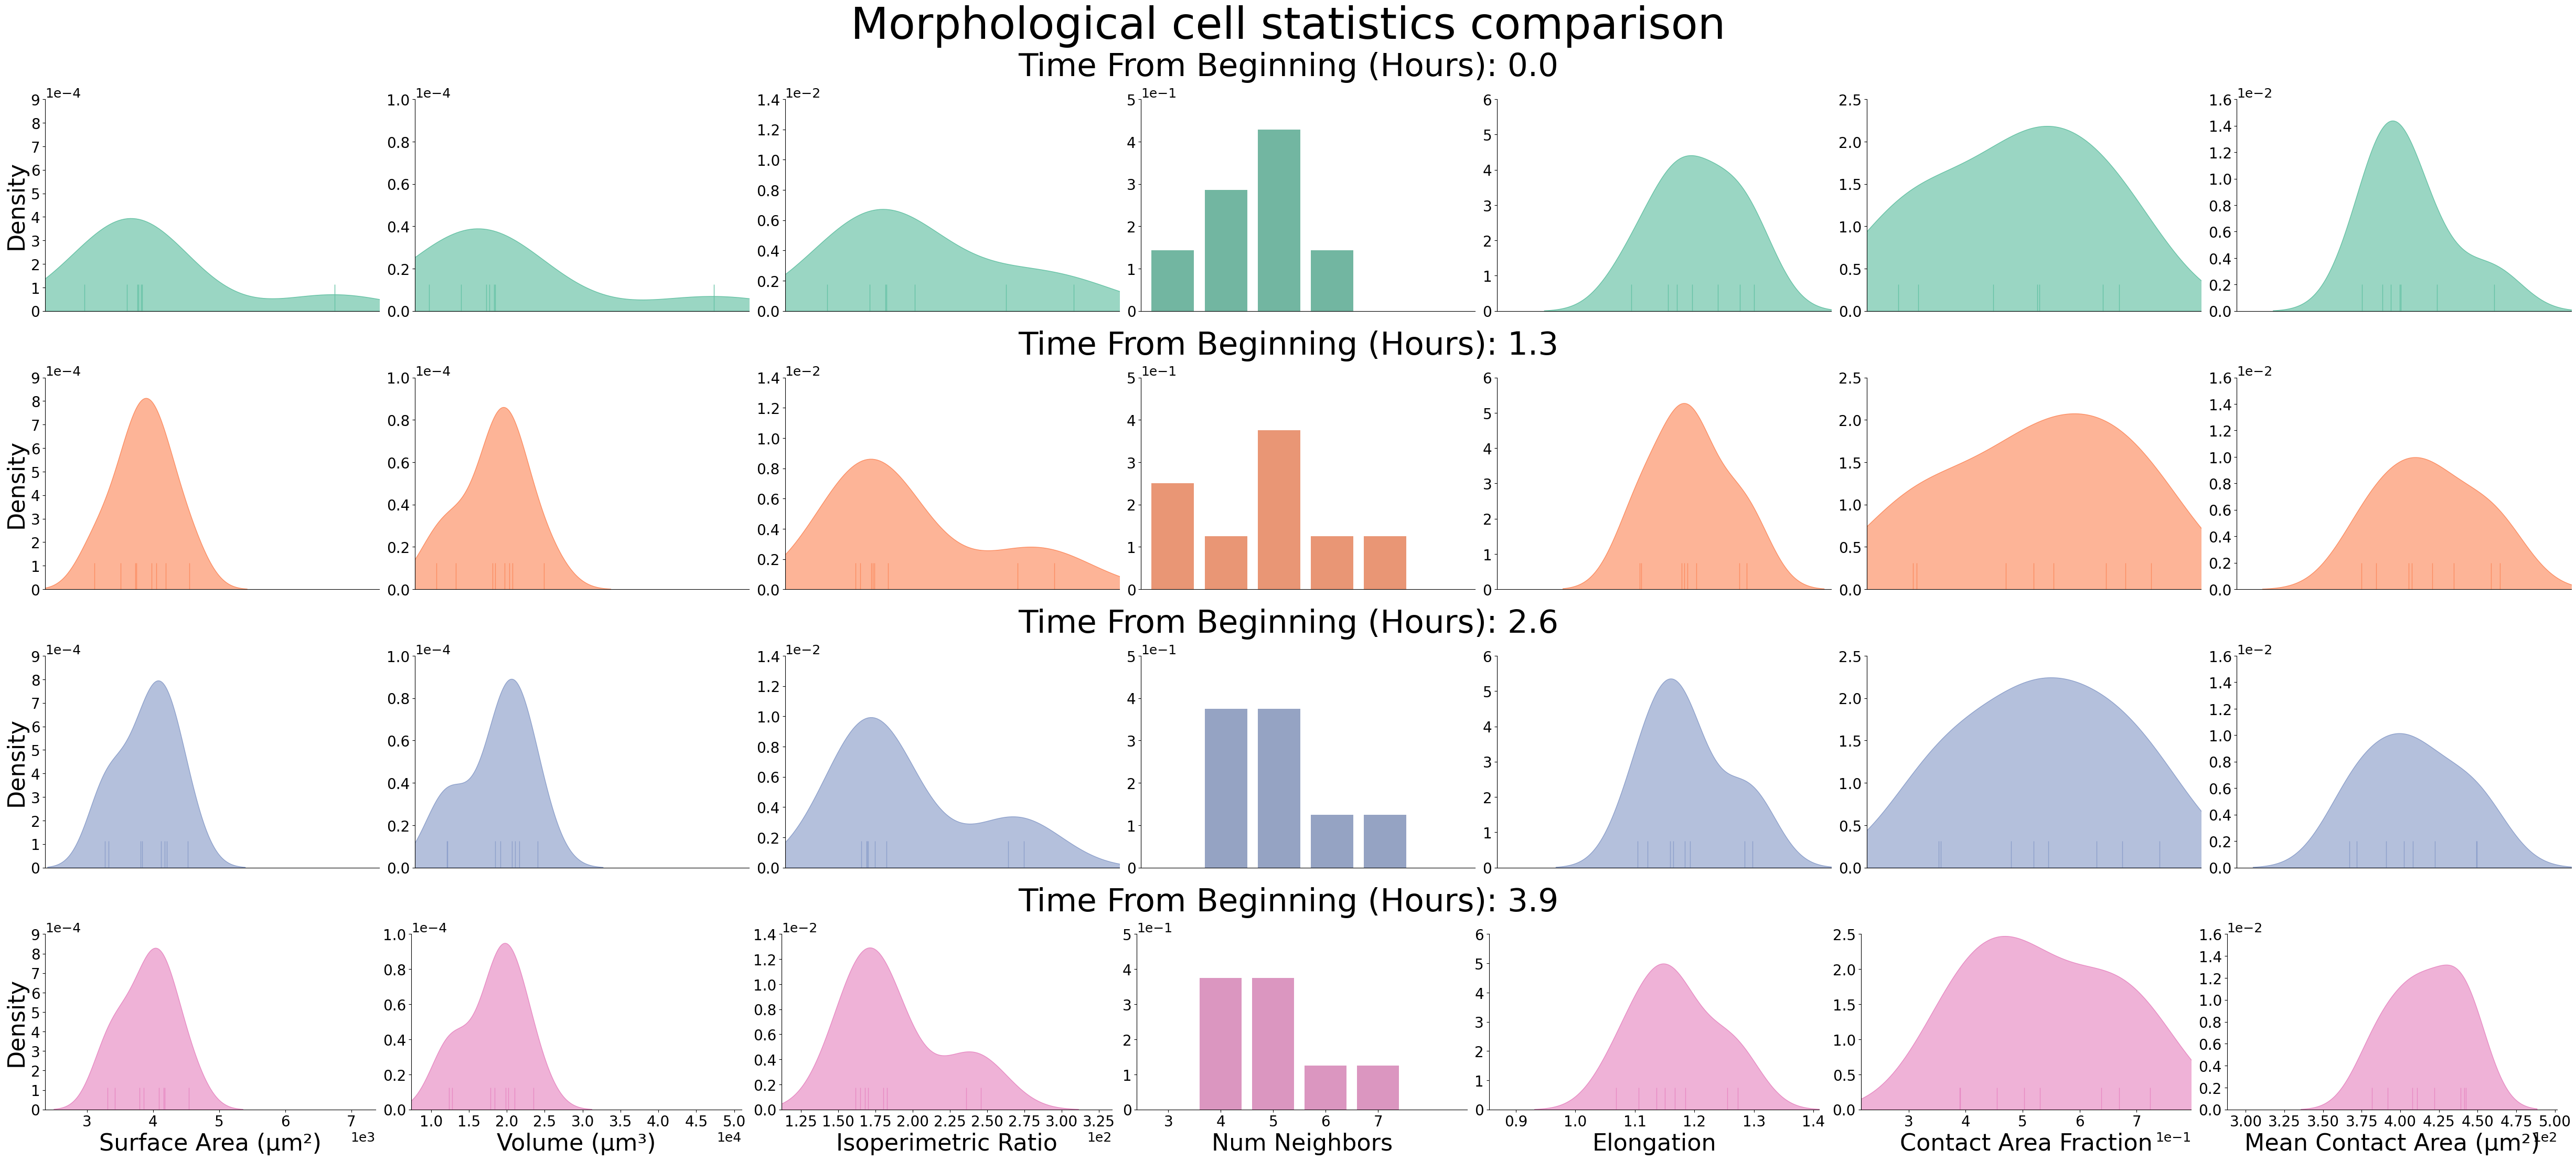

In [13]:
uoms = [
    '\u00B5m' + '\u00B2', 
    '\u00B5m' + '\u00B3', 
    None, 
    None,
    None,
    None,
    '\u00B5m' + '\u00B2'
]

y_lims = [0.0009, 0.00010, 0.014, 0.5, 6.0, 2.5, 0.016]

sp.features_grid_kdplots(
    df=numeric_cell_stats_df,
    features=numerical_features,
    y_lims=y_lims,
    remove_outliers=False,
    units_of_measure=uoms,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.4. Lewis' Law plots

Lewis' law states that the average apical area of cells having $n$ neighbors $\bar{A}_n$ is linearly related to the number of neighbors $n$ itself. $\newline$
In particular we have the following relation:
$$ \frac{\bar{A}_n}{\bar{A}} = \frac{n - 2}{4} $$
In 3D we could have a similar relation for volumes, namely:
$$ \frac{\bar{V}_n}{\bar{V}} \sim n $$


In [ ]:
# sp.lewis_law_plots(
#     df=numeric_cell_stats_df,
#     feature='volume',
#     fit_degrees=[1,2],
#     remove_outliers=False,
#     color_map=cell_cmap,
#     save_dir=save_plots_dir,
#     show=True
# )

### 3.5. Violin Plots for individual samples

In [15]:
# features = [
#     'surface_area', 'volume', 'isoperimetric_ratio', 
#     'elongation',
#     'contact_area_fraction', 'mean_contact_area'
# ]
# sp.violin_plots(
#     df=numeric_cell_stats_df, 
#     tissue='0h',
#     features=features,
#     units_of_measure=uoms,
#     remove_outliers=False,
#     color_map='viridis',
#     save_dir=None, 
#     show=True
# )

### 3.6 Statistical analysis

In [29]:
import scipy.stats as stats

# Independent samples t-test of contact area fraction between 0h and 12.5h
tissue_types = ['4-cell stage', '8-cell stage']
data = [cell_stats_df.loc[cell_stats_df['tissue_type'] == t, 'contact_area_fraction'] for t in tissue_types]
statistic, p_value = stats.f_oneway(*data)
print('p-value: ', p_value)
print('statistic: ', statistic)
print('mean: ', [np.mean(d) for d in data])
print('std: ', [np.std(d) for d in data])

p-value:  0.010269477327131014
statistic:  9.945351219146213
mean:  [0.30666749085974165, 0.4977301479222875]
std:  [0.0724694127291114, 0.09802687811563313]


In [22]:
# pairwise t-tests between all time points
import itertools


# Get unique tissue types
tissue_types = cell_stats_df['tissue_type'].unique()

# Perform pairwise statistical comparisons
p_values = []
for tissue_type1, tissue_type2 in itertools.combinations(tissue_types, 2):
    data1 = cell_stats_df.loc[cell_stats_df['tissue_type'] == tissue_type1, 'contact_area_fraction']
    data2 = cell_stats_df.loc[cell_stats_df['tissue_type'] == tissue_type2, 'contact_area_fraction']
    _, p_value = stats.ttest_ind(data1, data2)  # or use appropriate test (e.g., Mann-Whitney U test)
    p_values.append(p_value)

# Apply Bonferroni correction
alpha = 0.05
adjusted_alpha = alpha / len(p_values)
reject_null = [p < adjusted_alpha for p in p_values]

# Interpret the results
pairs = list(itertools.combinations(tissue_types, 2))
for i, (tissue_type1, tissue_type2) in enumerate(pairs):
    p_value = p_values[i]
    reject = reject_null[i]
    if reject:
        print(f"Tissue types: {tissue_type1} vs {tissue_type2} - Significant difference (p-value: {p_value})")
    else:
        print(f"Tissue types: {tissue_type1} vs {tissue_type2} - No significant difference (p-value: {p_value})")


Tissue types: 0.0 vs 3.3 - No significant difference (p-value: 0.06415492756451995)
Tissue types: 0.0 vs 6.6 - No significant difference (p-value: 0.05248647042243469)
Tissue types: 0.0 vs 9.8 - No significant difference (p-value: 0.04159473905345585)
Tissue types: 0.0 vs 12.1 - No significant difference (p-value: 0.03565002434627329)
Tissue types: 3.3 vs 6.6 - No significant difference (p-value: 0.8124469895987146)
Tissue types: 3.3 vs 9.8 - No significant difference (p-value: 0.7529956682299948)
Tissue types: 3.3 vs 12.1 - No significant difference (p-value: 0.7455429389340441)
Tissue types: 6.6 vs 9.8 - No significant difference (p-value: 0.9496169657284562)
Tissue types: 6.6 vs 12.1 - No significant difference (p-value: 0.9529013890376621)
Tissue types: 9.8 vs 12.1 - No significant difference (p-value: 0.9940055536845738)


In [18]:
# compare all time points with 0h

from statsmodels.stats.multitest import multipletests

# Subset the data for the desired columns
subset_df = cell_stats_df[['tissue_type', 'contact_area_fraction']]

# Create an empty list to store the results
results = []

group_0_data = subset_df[subset_df['tissue_type'] == '0.0']['contact_area_fraction']

# Iterate over each group
for group in subset_df['tissue_type'].unique()[1:]:
    # Filter the data for the current group 
    current_group_data = subset_df[subset_df['tissue_type'] == group]['contact_area_fraction']
    
    # Perform the independent t-test
    t_statistic, p_value = stats.ttest_ind(current_group_data, group_0_data)
    
    # Append the results to the list
    results.append((group, p_value))

# Extract the p-values from the results
p_values = [result[1] for result in results]

# Perform p-value adjustment using the Benjamini-Hochberg method
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Time From Beginning (Hours)': [result[0] for result in results],
    'p-value': p_values,
    'Adjusted p-value': adjusted_p_values
})

print(results_df)


  Time From 8-Cell Stage (Hours)   p-value  Adjusted p-value
0                            1.3  0.626266          0.626266
1                            2.6  0.518385          0.626266
2                            3.9  0.385717          0.626266


In [24]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Subset the data for the desired columns
subset_df = cell_stats_df[['tissue_type', 'contact_area_fraction']]

# Perform the Tukey test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(
    subset_df['contact_area_fraction'],
    subset_df['tissue_type'],
    alpha=0.05
)

print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0   12.1   0.1346 0.1265 -0.0235 0.2927  False
   0.0    3.3   0.1186 0.2198 -0.0395 0.2767  False
   0.0    6.6   0.1315 0.1417 -0.0266 0.2896  False
   0.0    9.8    0.135 0.1247 -0.0231 0.2931  False
  12.1    3.3   -0.016 0.9984 -0.1741 0.1421  False
  12.1    6.6  -0.0031    1.0 -0.1612  0.155  False
  12.1    9.8   0.0004    1.0 -0.1577 0.1585  False
   3.3    6.6   0.0129 0.9993 -0.1452  0.171  False
   3.3    9.8   0.0164 0.9982 -0.1417 0.1745  False
   6.6    9.8   0.0035    1.0 -0.1546 0.1616  False
---------------------------------------------------


### 3.7. Plots of 2D statistics along standard cartesian axes

#### 3.7.0. Number of 2D neighbors barplots

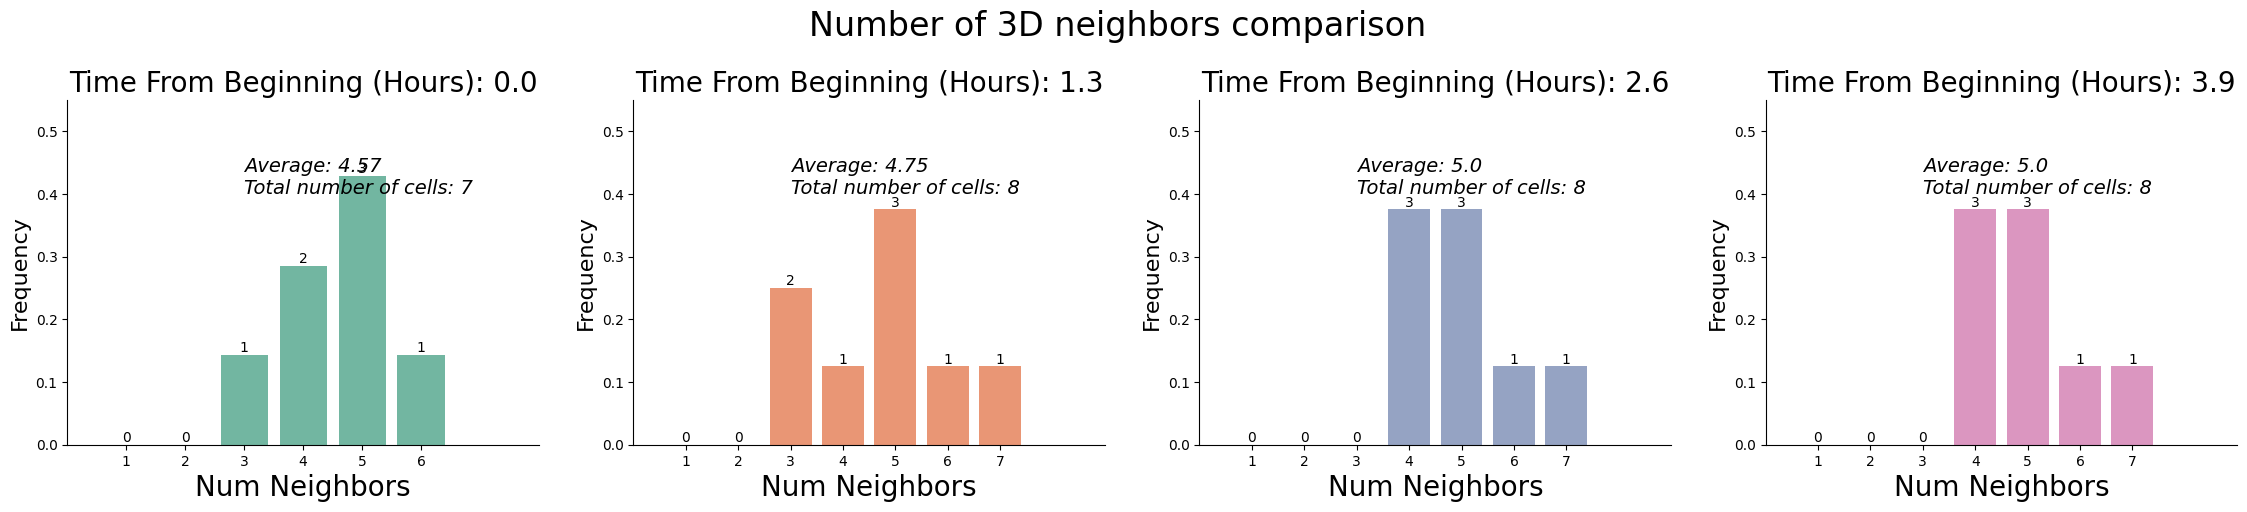

In [14]:
sp.num_neighbors_barplots(
    df=cell_stats_df,
    version='3D',
    remove_outliers=False,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.8. Plots mean and std against time

In [15]:
# Group the data by "tissue_type" and calculate mean and std for each feature
def group_data(
    custom_order,
    cell_stats_df,
    numerical_features
):
    # Convert "tissue_type" to a categorical variable with the custom order
    cell_stats_df['tissue_type'] = pd.Categorical(cell_stats_df['tissue_type'], categories=custom_order, ordered=True)

    # Group the data by "tissue_type" and calculate mean and std for each feature
    grouped_data = cell_stats_df.groupby('tissue_type')[numerical_features].agg(['mean', 'std'])

    # Reset the index to convert the 'tissue_type' group labels to a column
    grouped_data = grouped_data.reset_index()

    return grouped_data


In [16]:
def make_mean_std_plot(
    grouped_data,
    x_label,
    unit_of_measures,
    save_dir
):
    # Create subplots with 4 plots in the first row and 3 in the second
    fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
    fig.suptitle("Morphological progression with time", fontsize=44)
    # Flatten the axs array to access individual subplots
    axs = axs.flatten()

    # Plotting mean and standard deviation for each feature in the first row
    for i, feature in enumerate(numerical_features):
        ax = axs[i]
        unit_of_measure = unit_of_measures[i]
        # Plotting mean values with lines and error bars
        ax.errorbar(grouped_data['tissue_type'], grouped_data[feature]['mean'],
                    yerr=grouped_data[feature]['std'], fmt='o', capsize=5, label='Mean')
        ax.plot(grouped_data['tissue_type'], grouped_data[feature]['mean'], marker='o', linestyle='-')
        
        # Customize the plot
        ax.set_xlabel(x_label, fontsize=20) 
        if unit_of_measure:
            ax.set_title(f'{feature.replace("_", " ").capitalize()}' + f'({unit_of_measure})', fontsize=30)
        else:
            ax.set_title(f'{feature.replace("_", " ").capitalize()}', fontsize=30)
        ax.legend()
        ax.grid(True)
        
        # Set larger font size
        ax.tick_params(axis='both', which='major', labelsize=16)

    fig.delaxes(axs[7])  # remove the last subplot

    plt.tight_layout()

    if save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_name = f"mean_std_plot.jpg"
        plt.savefig(os.path.join(save_dir, save_name), bbox_inches='tight', dpi=150) 
    plt.show()

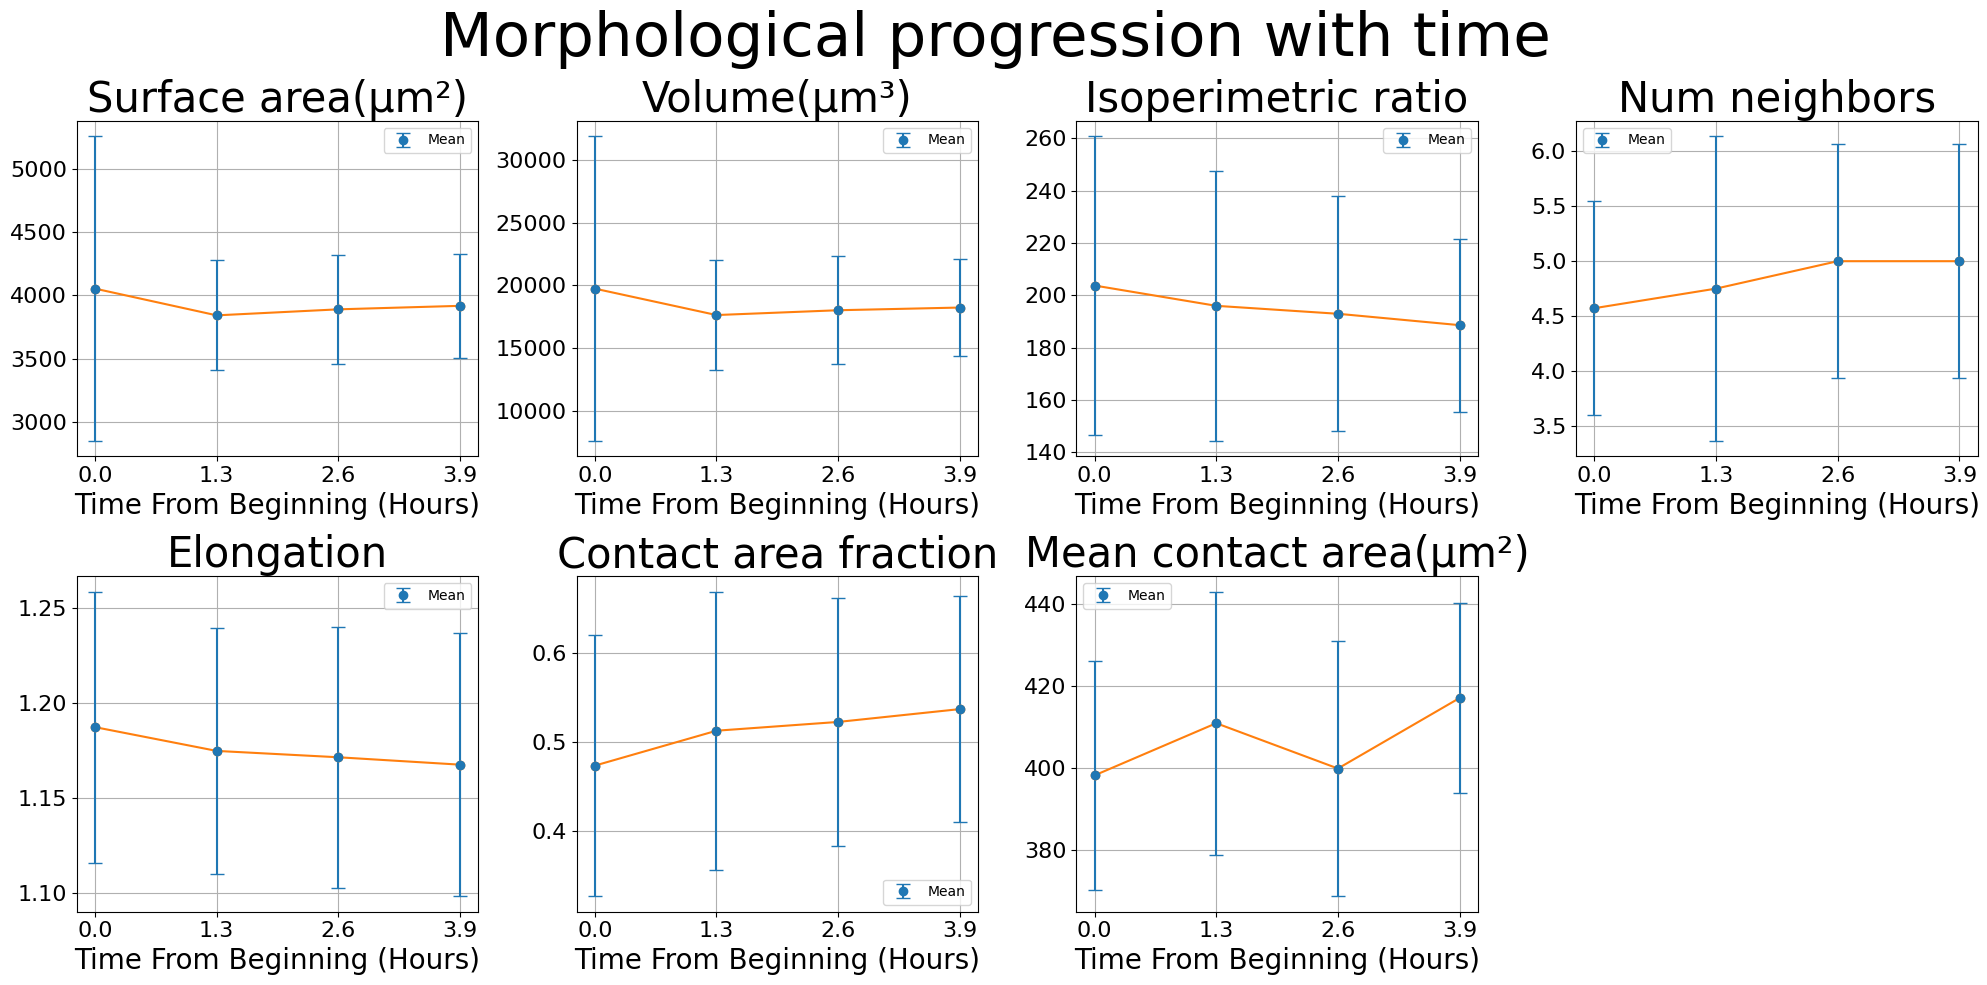

In [17]:
# Define the custom order for "tissue_type" (time steps)
# custom_order = ['0.0', '3.0', '5.0', '8.0', '12.5']  # Customize this based on your specific data
# custom_order = ['4-cell stage', '8-cell stage']  # Customize this based on your specific data
# custom_order = ['0.0', '1.3', '2.6', '3.9', '5.2', '6.5', '7.8', '9.1']  # Customize this based on your specific data
# custom_order = ['0.0', '3.3', '6.6', '9.8', '12.1']
custom_order = ['0.0', '1.3', '2.6', '3.9']
grouped_data = group_data(
    custom_order,
    cell_stats_df,
    numerical_features
)

# x_label = 'Time From 8-Cell Stage (Hours)'
# x_label = 'Different stages'
x_label = 'Time From Beginning (Hours)'
# print(grouped_data)
make_mean_std_plot(
    grouped_data,
    x_label,
    unit_of_measures=uoms,
    save_dir=save_plots_dir
)